In [23]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\owid-covid-data.csv")
dfh = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\current-covid-patients-hospital.csv")

dfc = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\dfcc.csv")
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfv = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\dfv.csv")
dfv.index = dfv['Unnamed: 0'].values
del dfv['Unnamed: 0']

dff = pd.read_csv(r"C:\Users\user01\Documents\GitHub\Project\CSVs\WPP2019_TotalPopulationBySex.csv")

In [25]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138722,ZWE,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138723,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138724,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138725,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [26]:
df['location'] == dfc.columns[0]

0          True
1          True
2          True
3          True
4          True
          ...  
138722    False
138723    False
138724    False
138725    False
138726    False
Name: location, Length: 138727, dtype: bool

In [27]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [28]:
massive = [0]*708
for i in range(708):
    massive[i] = i
c = np.unique(df['location'])
dfv = pd.DataFrame(index = massive, columns = c)

In [29]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df['nam'] = 0
for i in range(138727):
    df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
for i in range(138727):
    if df['date'].iloc[i].year == 2021:
        df['nam'].iloc[i] = df['nam'].iloc[i]+365

<ipython-input-31-7ee7ee187150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days


KeyboardInterrupt: 

In [ ]:
for i in range(138727):
    dfv[df['location'][i]][df['nam'][i]]=df['people_fully_vaccinated'][i]

In [ ]:
df['new_vaccinations'][653]

In [ ]:
dfv

In [ ]:
dfcsr = dfc
dfvsr = dfv
dfcsr = dfc.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #лагорифмирует все значения из датафреймов
dfvsr = dfv.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #очень плохо реагирует на нули так как лагорифма его нет

In [ ]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(533, 13857.0, c = 'orange', s = 200)
plt.show

In [ ]:
dfv['Russia']

In [ ]:
dfv = dfv.fillna(0)

In [ ]:
a = 0
for i in range(554):
    a = a + dfc.iloc[i]['Russia']


In [ ]:
a

In [ ]:
max(dfv['Russia'])

In [32]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
dff['Time'] == 1950

0          True
1         False
2         False
3         False
4         False
          ...  
280927    False
280928    False
280929    False
280930    False
280931    False
Name: Time, Length: 280932, dtype: bool

In [34]:
np.unique(dff['Location'])

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'American Samoa', 'Andean Community', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Cari

In [35]:
a = dff[dff['Location'] == 'Russian Federation']['PopTotal'].iloc[71] * 1000
b = 0 
for i in range(708):
    if dfv['Russia'].values[i] > a * 0.4:
        print(i, dfv['Russia'].values[i])
        break

In [36]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dfc['Russia'][703]

32374.0

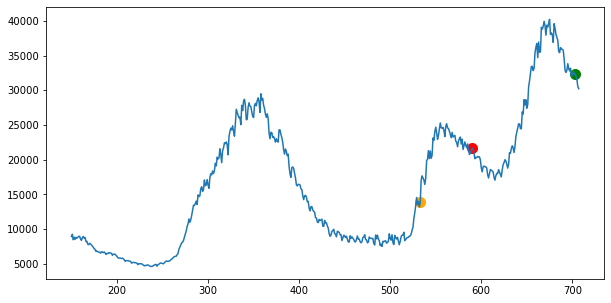

In [38]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(533, 13857.0, c = 'orange', s = 100)
plt.scatter(590, 21661.0, c = 'red', s = 100)
plt.scatter(703, 32374.0, c = 'green', s = 100)
plt.show()

In [40]:
dfv.to_csv('dfv.csv')